# IBM DATA SCIENCE CAPSTONE PROJECT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy import stats

import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("Collisions.csv")
pd.set_option('display.max_columns', None)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Removing duplicate columns
df.drop(["SEVERITYCODE.1"], axis = 1 , inplace = True)

In [4]:
# Dropping unnecessary columns 
df.drop(["CROSSWALKKEY","LOCATION","SEGLANEKEY", "ST_COLCODE", "SDOTCOLNUM", "SDOT_COLCODE","EXCEPTRSNDESC", "EXCEPTRSNCODE","INTKEY","REPORTNO","STATUS","COLDETKEY","OBJECTID","INCKEY"], axis = 1, inplace = True)

In [5]:
df.describe(include ='all')

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,192747,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673,29805,189789,189592,189661,189503,4667,9333,189769,194673
unique,NaN,NaN,NaN,3,2,10,NaN,NaN,NaN,NaN,5985,162058,7,39,1,4,11,9,9,1,1,62,2
top,NaN,NaN,NaN,Block,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,Y,One parked--one moving,N
freq,NaN,NaN,NaN,126926,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,85209,29805,100274,111135,124510,116137,4667,9333,44421,187457
mean,1.298901,-122.330518,47.619543,NaN,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,0.029976,0.056157,NaN,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-122.419091,47.495573,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,-122.348673,47.575956,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,-122.330224,47.615369,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,-122.311937,47.663664,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLDESC          4904
HITPARKEDCAR           0
dtype: int64

In [7]:
num_missing = (df == 0).sum()
num_missing

SEVERITYCODE           0
X                      0
Y                      0
ADDRTYPE               0
SEVERITYDESC           0
COLLISIONTYPE          0
PERSONCOUNT         5544
PEDCOUNT          187734
PEDCYLCOUNT       189189
VEHCOUNT            5085
INCDATE                0
INCDTTM                0
JUNCTIONTYPE           0
SDOT_COLDESC           0
INATTENTIONIND         0
UNDERINFL              0
WEATHER                0
ROADCOND               0
LIGHTCOND              0
PEDROWNOTGRNT          0
SPEEDING               0
ST_COLDESC             0
HITPARKEDCAR           0
dtype: int64

In [8]:
#Dropping all null values in the columns below
df = df.dropna(subset = ['ADDRTYPE','ST_COLDESC','COLLISIONTYPE','JUNCTIONTYPE', 'LIGHTCOND', 'WEATHER', 'ROADCOND','X','Y'])


In [9]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
ST_COLDESC         object
HITPARKEDCAR       object
dtype: object


In [10]:
df["SPEEDING"].replace("Y","1", inplace = True)
df["SPEEDING"].replace(np.nan,"0", inplace = True)
df["PEDROWNOTGRNT"].replace(np.nan,"0", inplace = True)
df["PEDROWNOTGRNT"].replace("Y","1", inplace = True)
df["INATTENTIONIND"].replace(np.nan,"0", inplace = True)
df["INATTENTIONIND"].replace("Y","1", inplace = True)
df["UNDERINFL"].replace("N","0", inplace = True)
df["UNDERINFL"].replace("Y","1", inplace = True)

In [11]:
df.reset_index()

,index,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR
0,0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,Entering at angle,N
1,1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,From same direction - both going straight - bo...,N
2,2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,One parked--one moving,N
3,3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From same direction - all others,N
4,4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,Entering at angle,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180062,194668,2,-122.290826,47.565408,Block,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From opposite direction - both moving - head-on,N
180063,194669,1,-122.344526,47.690924,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1,0,Raining,Wet,Daylight,0,0,From same direction - both going straight - bo...,N
180064,194670,2,-122.306689,47.683047,Intersection,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From opposite direction - one left turn - one ...,N
180065,194671,2,-122.355317,47.678734,Intersection,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,0,Clear,Dry,Dusk,0,0,Vehicle Strikes Pedalcyclist,N


## Extracting useful data from date and time column 

In [12]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [13]:
df["Day"] = df['INCDTTM'].map(lambda x: x.day)
df["Month"] = df['INCDTTM'].map(lambda x: x.month)
df["Year"] = df['INCDTTM'].map(lambda x: x.year)

In [14]:
df['day_of_week'] = df['INCDTTM'].dt.day_name()

In [15]:
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [16]:
df['hours'] = df.INCDTTM.dt.hour

In [17]:
df

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR,Day,Month,Year,day_of_week,weekend,hours
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,2013-03-27 14:54:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,Entering at angle,N,27,3,2013,Wednesday,0,14
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,2006-12-20 18:55:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,From same direction - both going straight - bo...,N,20,12,2006,Wednesday,0,18
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,2004-11-18 10:20:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,One parked--one moving,N,18,11,2004,Thursday,0,10
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,2013-03-29 09:26:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From same direction - all others,N,29,3,2013,Friday,1,9
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,2004-01-28 08:04:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,Entering at angle,N,28,1,2004,Wednesday,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,Block,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,2018-11-12 08:12:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From opposite direction - both moving - head-on,N,12,11,2018,Monday,0,8
194669,1,-122.344526,47.690924,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,2018-12-18 09:14:00,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1,0,Raining,Wet,Daylight,0,0,From same direction - both going straight - bo...,N,18,12,2018,Tuesday,0,9
194670,2,-122.306689,47.683047,Intersection,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,2019-01-19 09:25:00,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From opposite direction - one left turn - one ...,N,19,1,2019,Saturday,1,9
194671,2,-122.355317,47.678734,Intersection,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,2019-01-15 16:48:00,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,0,Clear,Dry,Dusk,0,0,Vehicle Strikes Pedalcyclist,N,15,1,2019,Tuesday,0,16


## Chi square test

In [18]:
# Code for chi square is taken from "https://www.hackdeploy.com/chi-square-feature-selection-in-python"

import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['ADDRTYPE', 'JUNCTIONTYPE', 'LIGHTCOND', 'WEATHER', 'ROADCOND','COLLISIONTYPE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','ST_COLDESC','HITPARKEDCAR','Day','Month','Year','day_of_week','weekend','hours']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SEVERITYCODE" )  

ADDRTYPE is IMPORTANT for Prediction
JUNCTIONTYPE is IMPORTANT for Prediction
LIGHTCOND is IMPORTANT for Prediction
WEATHER is IMPORTANT for Prediction
ROADCOND is IMPORTANT for Prediction
COLLISIONTYPE is IMPORTANT for Prediction
SDOT_COLDESC is IMPORTANT for Prediction
INATTENTIONIND is IMPORTANT for Prediction
UNDERINFL is IMPORTANT for Prediction
PEDROWNOTGRNT is IMPORTANT for Prediction
SPEEDING is IMPORTANT for Prediction
ST_COLDESC is IMPORTANT for Prediction
HITPARKEDCAR is IMPORTANT for Prediction
Day is NOT an important predictor. (Discard Day from model)
Month is IMPORTANT for Prediction
Year is IMPORTANT for Prediction
day_of_week is IMPORTANT for Prediction
weekend is IMPORTANT for Prediction
hours is IMPORTANT for Prediction


## Data Visualization

In [19]:
df_plt1 = df['ADDRTYPE']
df_plt2 = df['COLLISIONTYPE']
df_plt3 = df['JUNCTIONTYPE']
df_plt4 = df['WEATHER']
df_plt5 = df['LIGHTCOND']
df_plt6 = df['ROADCOND']

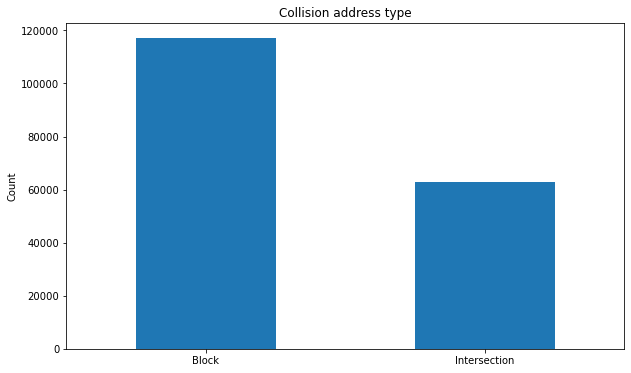

In [20]:
df_plt1.value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Collision address type') # add title to the plot
plt.xticks(rotation='horizontal')
plt.savefig('ADDRTYPE1.png')
plt.show()

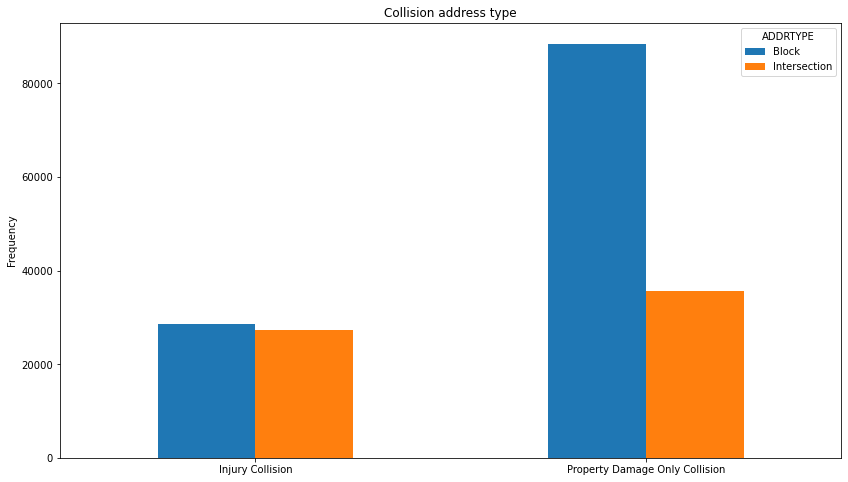

In [21]:
ax = df.groupby(['ADDRTYPE','SEVERITYDESC'])['ADDRTYPE'].count().unstack(0).plot.bar(title="Collision address type", figsize=(14,8))
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('ADDRTYPE2.png')

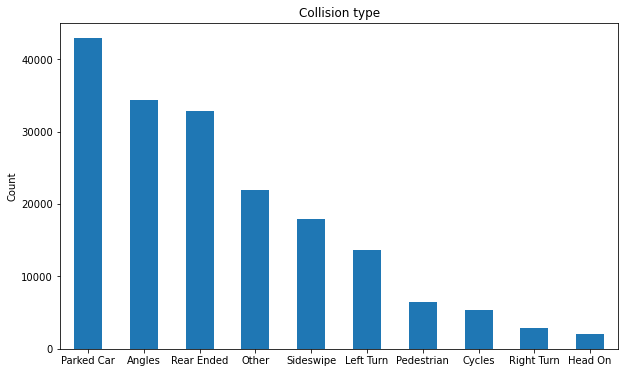

In [22]:
df_plt2.value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Collision type') # add title to the plot
plt.xticks(rotation='horizontal')
plt.savefig('Collisiontype1.png')
plt.show()

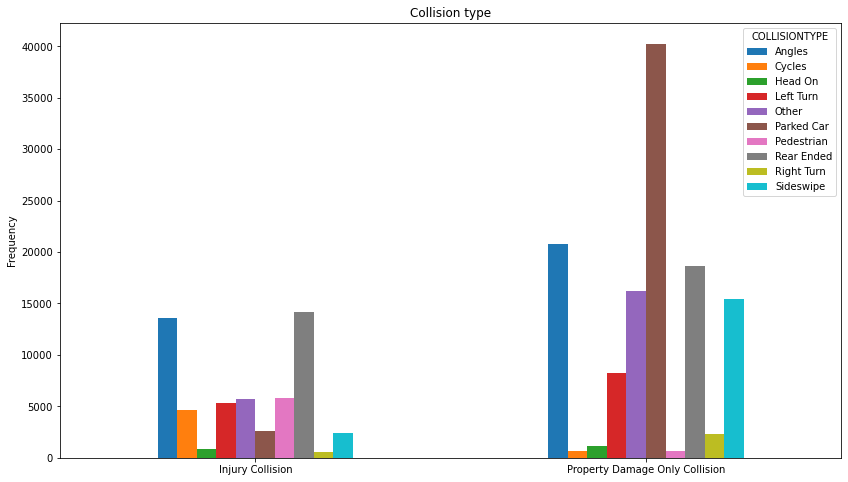

In [23]:
ax = df.groupby(['COLLISIONTYPE','SEVERITYDESC'])['COLLISIONTYPE'].count().unstack(0).plot.bar(title="Collision type", figsize=(14,8))
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('Collisiontype2.png')

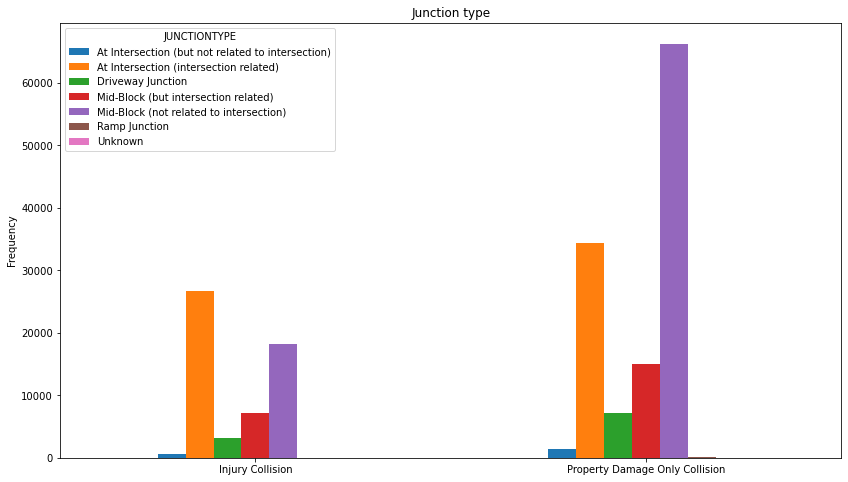

In [24]:
ax = df.groupby(['JUNCTIONTYPE','SEVERITYDESC'])['JUNCTIONTYPE'].count().unstack(0).plot.bar(title="Junction type", figsize=(14,8))
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('Junctiontype.png')


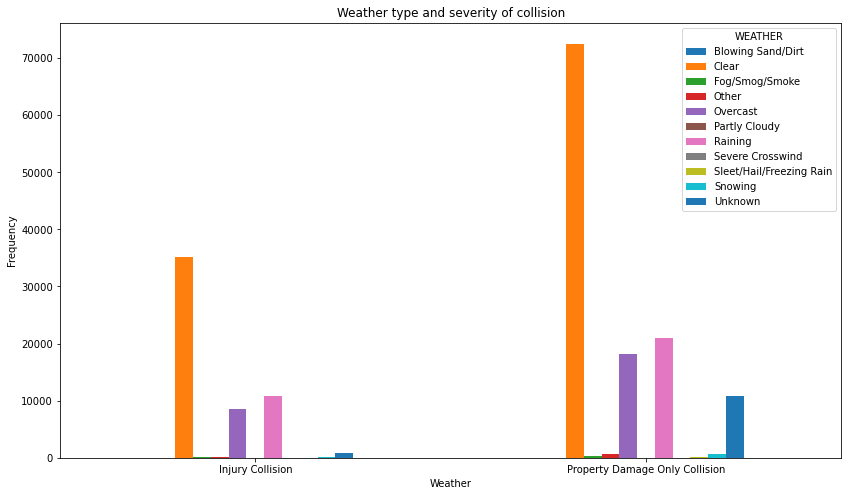

In [25]:
ax = df.groupby(['WEATHER','SEVERITYDESC'])['WEATHER'].count().unstack(0).plot.bar(title="Weather type and severity of collision", figsize=(14,8))
ax.set_xlabel('Weather')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('Weathertype.png')


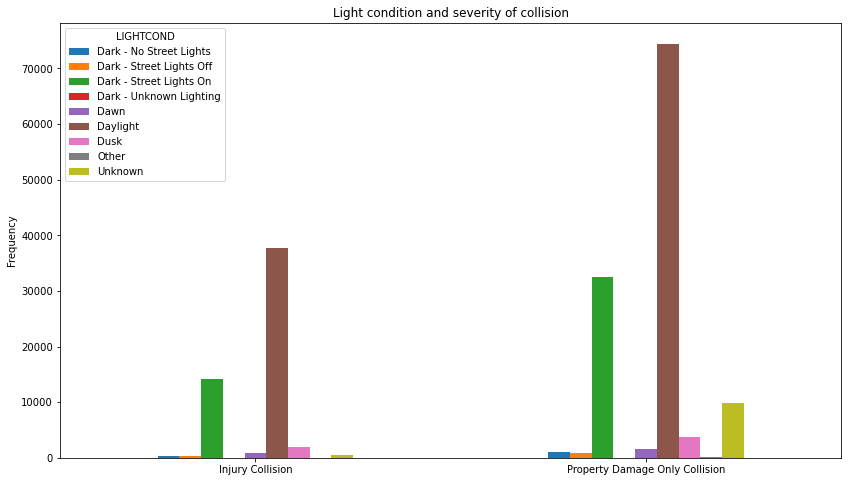

In [26]:
ax = df.groupby(['LIGHTCOND','SEVERITYDESC'])['LIGHTCOND'].count().unstack(0).plot.bar(title="Light condition and severity of collision", figsize=(14,8))
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('Lightcondition.png')


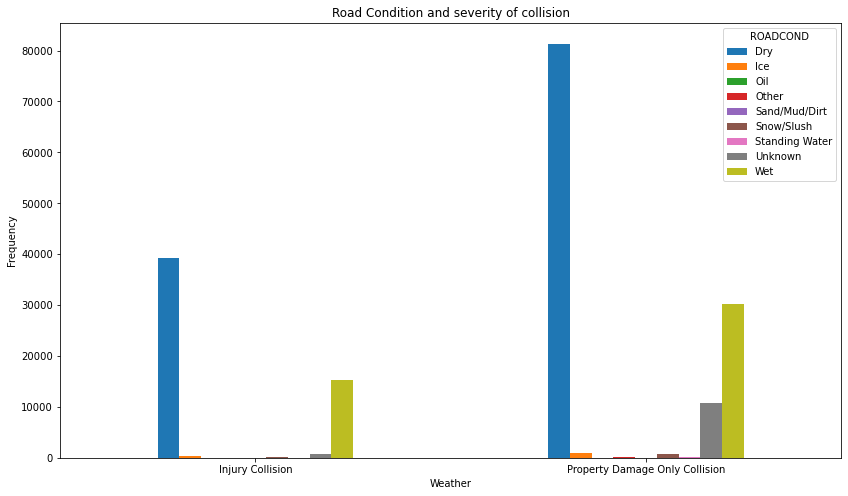

In [27]:
ax = df.groupby(['ROADCOND','SEVERITYDESC'])['ROADCOND'].count().unstack(0).plot.bar(title="Road Condition and severity of collision", figsize=(14,8))
ax.set_xlabel('Weather')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('Roadcondition.png')


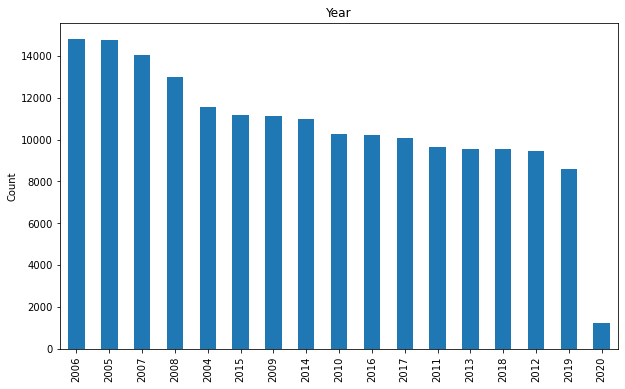

In [28]:
df_plt7 = df['Year']
df_plt7.value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Year') # add title to the plot
plt.show()

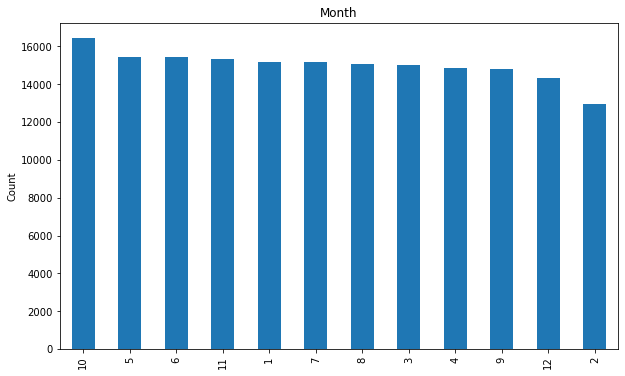

In [29]:
df_plt8 = df['Month']
df_plt8.value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Month') # add title to the plot
plt.show()

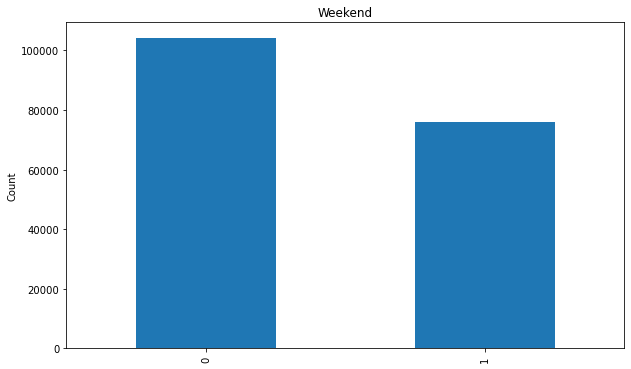

In [30]:
df_plt9 = df['weekend']
df_plt9.value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Weekend') # add title to the plot
plt.savefig('Weekend.png')

plt.show()

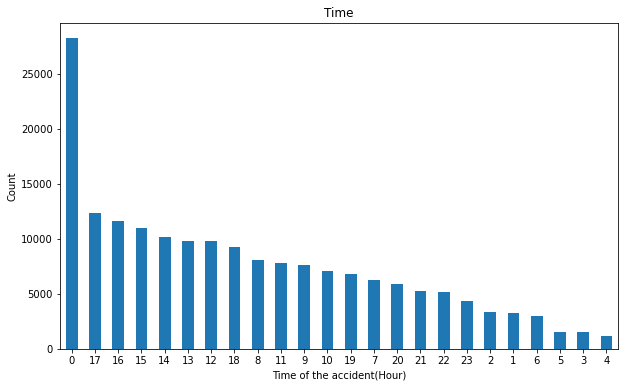

In [31]:
df_plt10 = df['hours']
df_plt10.value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Time of the accident(Hour)') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Time') # add title to the plot
plt.xticks(rotation='horizontal')
plt.savefig('Hour.png')
plt.show()

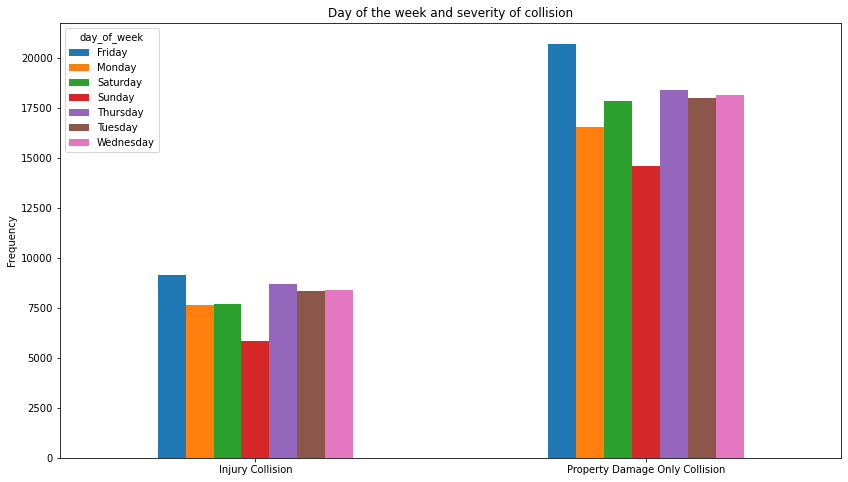

In [32]:
ax = df.groupby(['day_of_week','SEVERITYDESC'])['day_of_week'].count().unstack(0).plot.bar(title="Day of the week and severity of collision", figsize=(14,8))
ax.set_xlabel('')
ax.set_ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.savefig('Dayofweek.png')

## Scatter plot reveals the map of Seattle

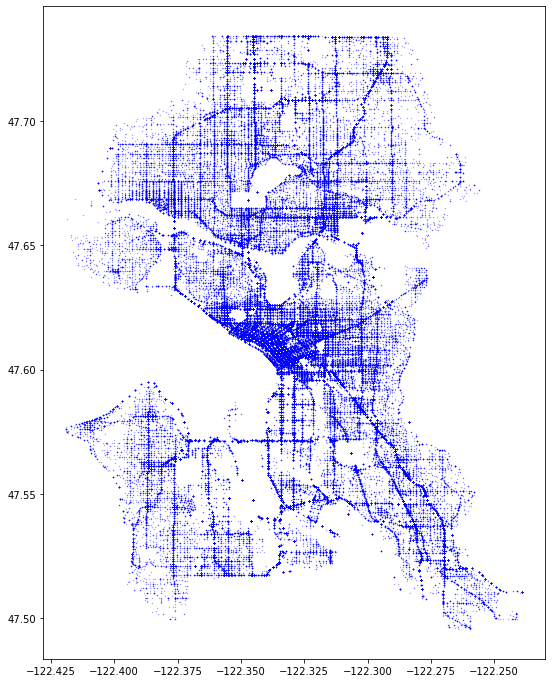

In [33]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(df.X, df.Y, s=0.1, alpha=0.5, c='b')
plt.show()
fig.savefig('ScatterCityGraph.png')

In [34]:
print(df.dtypes)

SEVERITYCODE               int64
X                        float64
Y                        float64
ADDRTYPE                  object
SEVERITYDESC              object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE                   object
INCDTTM           datetime64[ns]
JUNCTIONTYPE              object
SDOT_COLDESC              object
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT             object
SPEEDING                  object
ST_COLDESC                object
HITPARKEDCAR              object
Day                        int64
Month                      int64
Year                       int64
day_of_week               object
weekend                    int64
hours                      int64
dtype: object


In [35]:
df.drop(["INCDATE","Day","INCDTTM","SEVERITYDESC","Year","day_of_week"], axis = 1 , inplace = True)

## Normalize data

In [36]:
#separate dtypes
notif=df.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#checking to make sure all are accounted for
print(df.shape)
print(notif.shape)
print(intfldtypes.shape)


Objects Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR'],
      dtype='object')

NonObjects Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'Month', 'weekend', 'hours'],
      dtype='object')
(180067, 23)
(180067, 13)
(180067, 10)


In [37]:
#label encode objects to convert npn numeric value to numeric value
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(df_ml.shape)

(180067, 23)


In [38]:
df_ml

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Month,weekend,hours
0,1,0,1,14,0,0,4,8,5,0,0,4,0,2,-122.323148,47.703140,2,0,0,2,3,0,14
1,0,9,4,16,0,0,6,8,2,0,0,16,0,1,-122.347294,47.647172,2,0,0,2,12,0,18
2,0,5,4,17,0,0,4,0,5,0,0,27,0,1,-122.334540,47.607871,4,0,0,3,11,0,10
3,0,4,4,14,0,0,1,0,5,0,0,14,0,1,-122.334803,47.604803,3,0,0,3,3,1,9
4,1,0,1,14,0,0,6,8,5,0,0,4,0,2,-122.306426,47.545739,2,0,0,2,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,2,4,14,0,0,1,0,5,0,0,10,0,2,-122.290826,47.565408,3,0,0,2,11,0,8
194669,0,7,4,17,1,0,6,8,5,0,0,15,0,1,-122.344526,47.690924,2,0,0,2,12,0,9
194670,1,3,1,14,0,0,1,0,5,0,0,12,0,2,-122.306689,47.683047,3,0,0,2,1,1,9
194671,1,1,1,29,0,0,1,0,6,0,0,52,0,2,-122.355317,47.678734,2,0,1,1,1,0,16


In [39]:
from sklearn import preprocessing

severity_code = df_ml['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df_ml ["SEVERITYCODE"] = severity_code

## Machine learning Algorithm

In [40]:

X = df_ml.drop('SEVERITYCODE',axis=1)
y = df_ml['SEVERITYCODE']

In [41]:
df_ml.SEVERITYCODE.value_counts()

0    124258
1     55809
Name: SEVERITYCODE, dtype: int64

In [42]:
df_ml

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,Month,weekend,hours
0,1,0,1,14,0,0,4,8,5,0,0,4,0,1,-122.323148,47.703140,2,0,0,2,3,0,14
1,0,9,4,16,0,0,6,8,2,0,0,16,0,0,-122.347294,47.647172,2,0,0,2,12,0,18
2,0,5,4,17,0,0,4,0,5,0,0,27,0,0,-122.334540,47.607871,4,0,0,3,11,0,10
3,0,4,4,14,0,0,1,0,5,0,0,14,0,0,-122.334803,47.604803,3,0,0,3,3,1,9
4,1,0,1,14,0,0,6,8,5,0,0,4,0,1,-122.306426,47.545739,2,0,0,2,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,2,4,14,0,0,1,0,5,0,0,10,0,1,-122.290826,47.565408,3,0,0,2,11,0,8
194669,0,7,4,17,1,0,6,8,5,0,0,15,0,0,-122.344526,47.690924,2,0,0,2,12,0,9
194670,1,3,1,14,0,0,1,0,5,0,0,12,0,1,-122.306689,47.683047,3,0,0,2,1,1,9
194671,1,1,1,29,0,0,1,0,6,0,0,52,0,1,-122.355317,47.678734,2,0,1,1,1,0,16


In [43]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)


In [44]:
train_data = pd.concat([X_train, y_train], axis=1)

In [45]:
# Data Imbalance in target feature must be removed 
negative = train_data[train_data.SEVERITYCODE==0]
positive = train_data[train_data.SEVERITYCODE==1]

In [46]:
# upsample minority
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=3) # reproducible results

In [47]:
upsampled = pd.concat([negative, pos_upsampled])

In [48]:
upsampled.SEVERITYCODE.value_counts()

1    93239
0    93239
Name: SEVERITYCODE, dtype: int64

In [49]:
res_X_train = upsampled.drop('SEVERITYCODE', axis=1)
res_y_train = upsampled.SEVERITYCODE

## Decision tree 

In [50]:
crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
crashTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
crashTree.fit(res_X_train,res_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
predTree = crashTree.predict(X_test)

In [53]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 1 0]
46912     1
12668     1
191330    1
118472    1
121447    0
Name: SEVERITYCODE, dtype: int64


In [54]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7292356220983184


In [55]:
from sklearn.metrics import f1_score
score = f1_score(predTree, y_test)
score

0.5610889056929891

In [56]:
jaccard_similarity_score(y_test, predTree)

0.7292356220983184

In [57]:
from sklearn.metrics import precision_score
precision_score(y_test, predTree)

0.5656719668917447

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test, predTree)

0.5565795113587655

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     31019
           1       0.57      0.56      0.56     13998

   micro avg       0.73      0.73      0.73     45017
   macro avg       0.68      0.68      0.68     45017
weighted avg       0.73      0.73      0.73     45017



## Logistic regression

In [60]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(res_X_train,res_y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
yhat_prob1 = LR.predict_proba(X_test)
yhat_prob1

array([[0.57813334, 0.42186666],
       [0.62575665, 0.37424335],
       [0.47412126, 0.52587874],
       ...,
       [0.81643945, 0.18356055],
       [0.6074647 , 0.3925353 ],
       [0.57155966, 0.42844034]])

In [63]:
jaccard_similarity_score(y_test, yhat)

0.6849190305884444

In [64]:
log_loss(y_test, yhat_prob1)

0.5856459708436873

In [65]:
score1 = f1_score(yhat, y_test, average='macro')
score1

0.6548508174591945

In [66]:
precision_score(y_test, yhat, average='micro')

0.6849190305884444

In [67]:
recall_score(y_test, yhat, average='macro')

0.668954705438639

In [68]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     31019
           1       0.49      0.63      0.55     13998

   micro avg       0.68      0.68      0.68     45017
   macro avg       0.65      0.67      0.65     45017
weighted avg       0.71      0.68      0.69     45017



In [69]:
# Logistic regression with a different solver
LR2 = LogisticRegression(C=0.01, solver='sag').fit(res_X_train,res_y_train)
LR2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
yhat2 = LR.predict(X_test)
yhat2

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
yhat_prob2 = LR2.predict_proba(X_test)
yhat_prob2

array([[0.57815096, 0.42184904],
       [0.62568273, 0.37431727],
       [0.47412495, 0.52587505],
       ...,
       [0.81650128, 0.18349872],
       [0.60758297, 0.39241703],
       [0.57158959, 0.42841041]])

In [72]:
jaccard_similarity_score(y_test, yhat2)

0.6849190305884444

In [73]:
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.59


In [74]:
score2 = f1_score(yhat2, y_test)
score2

0.5529782540182793

## ROC CURVE

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc




In [76]:
y_pred_proba = crashTree.predict_proba(X_test)[:,1]
predslog = LR.predict_proba(X_test)[:,1]

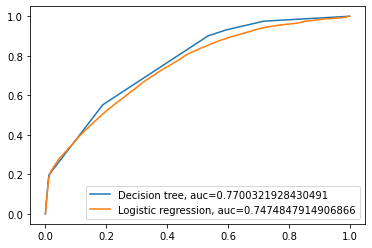

In [78]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Decision tree, auc="+str(auc))


fpr, tpr, thresh = metrics.roc_curve(y_test, predslog)
auc = metrics.roc_auc_score(y_test, predslog)
plt.plot(fpr,tpr,label="Logistic regression, auc="+str(auc))

plt.legend(loc=0)
plt.savefig('ROC.png')